# Image Edges Detection & Gradients

There are 3 High-pass (gradient) filters in OpenCV: Sobel, Scharr and Laplacian.

## Sobel & Scharr Derivatives - cv2.Sobel(), cv2.Scharr()
(Derivatives - производные)

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize.

## Laplacian Derivatives

It calculates the Laplacian of the image, where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudokusmall.jpg', 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)

plt.rcParams["figure.figsize"] = (20,13)
plt.subplot(2,2,1),plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show();

<Figure size 2000x1300 with 4 Axes>

# One Important Matter - Output DataType

In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

# Canny Edge Detection - cv2.Canny()

Consists of 4 stages:

1) Noise reduction (Gaussian filter, etc.)

2) Finding Intensity Gradient of the Image (Sobel filter in both horizontal and vertical direction to get first derivative in horizontal direction (G_x) and vertical direction (G_y). From these two images, we can find edge gradient and direction for each pixel. Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.)

3) Non-maximum Suppression - нахождение "тонкой границы" шириной в 1 пиксель, находящийсяы по центру старой, "толстой" границы (After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. In short, the result you get is a binary image with “thin edges”.)

4) Hysteresis Thresholding (This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded).

OpenCV has all of this in the one method - cv2.Canny(). 

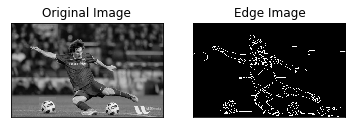

In [2]:
img = cv2.imread('messi5.jpg',0)

# apertureSize - size of Sobel kernel used for find image gradients
# L2gradient - specifies the equation for finding gradient magnitude, if True-more accurate
#              if False-not so accurate
edges = cv2.Canny(img, threshold1=100, threshold2=200,
                  apertureSize=3, L2gradient=True)
# cv2.Canny?

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Contours

Contour is curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

        For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
        findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
        In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.
        
## Basic application of a contour:

In [8]:
img = cv2.imread('drawing_2.png')

# transform to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transform grayscale to binary (only pure black and pure white)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# cv2.RETR_TREE - contour retrieval mode, discussed further
# cv2.CHAIN_APPROX_SIMPLE - contour approximation method
# contours in the output is a Python list of all the contours in the image. Each individual 
# contour is a Numpy array of (x,y) coordinates of boundary points of the object.

image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.findContours?

# contourIdx=-1 - which contour to draw (if = -1, draws all)
# (0, 255, 0), 3 - color, thickness
img1 = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# cv2.drawContours?

# for drawing individual contours use this code:
cnt = contours[0][1]
img2 = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

cv2.imshow('image', img)
cv2.waitKey(2000)
cv2.destroyAllWindows()
cv2.imshow('image', img2)
cv2.waitKey(2000)
cv2.destroyAllWindows()

## Contour Approximation Method

This is the third argument in cv2.findContours function. Contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? In many situations (for a simple straight line, etc.) nope, 2 points is enough. That`s what cv2.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

## Contour Features
### Image moments - cv2.moments()
It`s a certain particular weighted average (moment) of the image pixels' intensities, or a function of such moments. It help`s to calculate some features like center of mass of the object, area of the object etc.

cv2.moments() gives a dictionary of all moment values calculated:

In [10]:
img = cv2.imread('drawing_2.png',0)
ret, thresh = cv2.threshold(img,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print (M)

{'m00': 11620.0, 'm10': 2905000.0, 'm01': 1150380.0, 'm20': 736995445.3333333, 'm11': 287595000.0, 'm02': 124633065.33333333, 'm30': 189621584000.0, 'm21': 72962549088.0, 'm12': 31158266333.333332, 'm03': 14466271644.0, 'mu20': 10745445.333333135, 'mu11': 0.0, 'mu02': 10745445.333333328, 'mu30': 9.1552734375e-05, 'mu21': -1.0848045349121094e-05, 'mu12': -4.76837158203125e-07, 'mu03': 0.0, 'nu20': 0.07958150773736551, 'nu11': 0.0, 'nu02': 0.07958150773736695, 'nu30': 6.290077546444305e-15, 'nu21': -7.453086676125414e-16, 'nu12': -3.2760820554397425e-17, 'nu03': 0.0}


### Contour area - cv2.contourArea()
Возавращает площадь контура

### Contour Perimeter - cv2.arcLength()
Second argument specify whether shape is a closed contour (if passed True), or just a curve

### Contour Approximation - cv2.approxPolyDP()
Approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm.
Second argument is called epsilon, which is maximum distance from contour to approximated contour.

### Convex Hull - cv2.convexHull()
Выглядят как contour approximations, но не являются ими. Convex Hull - это такая "упрощённая обводка" контура (представь руку которую нарисовали как вытянутую трапецию).

### Bounding Rectangle - cv2.boundingRect(), cv2.minAreaRect()
Прямоугольники обводящие что-то на изображении (как у теслы они обводят машины, пешеходов и т.д.).
cv2.boundingRect() - draws a straight rectangle, without any rotation, so area of the bounding rectangle won’t be minimum.

cv2.minAreaRect - bounding rectangle with minimum area, so it considers the rotation also.

### Minimum Enclosing Circle - cv2.minEnclosingCircle()
Circumcircle of an object, It is a circle which completely covers the object with minimum area.

### Fitting an Ellipse - cv2.fitEllipse()
Fit an ellipse to an object. It returns the rotated rectangle in which the ellipse is inscribed.

### Fitting a Line - cv2.line()
If an image contains a set of white points we can approximate a straight line to it

In [12]:
# cv2.contourArea?
# cv2.arcLength?
# cv2.approxPolyDP?
# cv2.convexHull?
# cv2.convexHull?
# cv2.boundingRect?
# cv2.minAreaRect?
# cv2.minEnclosingCircle?
# cv2.ellipse?
# cv2.line?

## Contour Properties

### Aspect Ratio
ratio of width to height of bounding rect of the object

### Extent
ratio of contour area to bounding rectangle area

### Solidity
ratio of contour area to its convex hull area

### Equivalent Diameter
diameter of the circle whose area is same as the contour area

### Orientation
angle at which object is directed

### Mask and Pixel Points
In some cases, we may need all the points which comprises that object. It can be done as follows:

        mask = np.zeros(imgray.shape,np.uint8)
        cv2.drawContours(mask,[cnt],0,255,-1)
        pixelpoints = np.transpose(np.nonzero(mask))
        pixelpoints = cv2.findNonZero(mask)
   
Here, two methods, one using Numpy functions, next one using OpenCV function (last commented line) are given to do the same. Results are also same, but with a slight difference. Numpy gives coordinates in (row, column) format, while OpenCV gives coordinates in (x,y) format. So basically the answers will be interchanged. Note that, row = x and column = y.

### Maximum Value, Minimum Value and their locations
We can find these parameters using a mask image.

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)

### Mean Color or Mean Intensity
We can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

mean_val = cv2.mean(im,mask = mask)

### Extreme Points (крайние точки)

        leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
        rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
        topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
        bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
        
        
## Convexity Defects - cv2.convexityDefects()
We saw what is convex hull in second chapter about contours. Any deviation of the object from this hull can be considered as convexity defect.

## Point Polygon Test - cv2.pointPolygonTest()
finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

## Match Shapes - cv2.matchShapes()
Compares the 2 shapes/contours and returns a metric showing the similarity. The lower the result, the better match it is.

## Contours Hierarchy (parent-child relationship in contours)
Normally we use the cv2.findContours() function to detect objects in an image, right ? Sometimes objects are in different locations. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image has some relationship to each other. And we can specify how one contour is connected to each other, like, is it child of some other contour, or is it a parent etc. Representation of this relationship is called the Hierarchy.

OpenCV represents Hierarchy as an array of four values : [Next, Previous, First_Child, Parent]

### Contour Retrieval Mode

#### RETR_LIST
simplest of the four. It simply retrieves all the contours, but doesn’t create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

#### RETR_EXTERNAL
returns only extreme outer flags. All child contours are left behind. We can say, under this law, Only the eldest in every family is taken care of. It doesn’t care about other members of the family

#### RETR_CCOMP
retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
Just consider the image of a “big white zero” on a black background. Outer circle of zero belongs to first hierarchy, and inner circle of zero belongs to second hierarchy.

#### RETR_TREE
retrieves all the contours and creates a full family hierarchy list. It even tells, who is the grandpa, father, son, grandson and even beyond.